In [1]:
import tensorflow as tf

In [2]:
mnist=tf.keras.datasets.mnist

In [3]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
import matplotlib.pyplot as plt

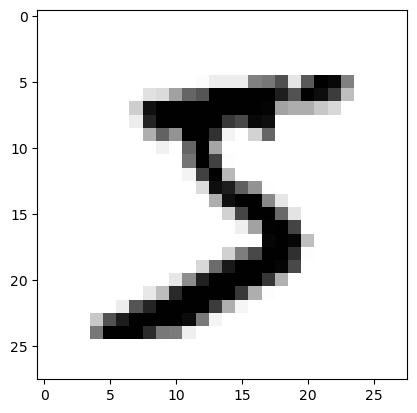

In [6]:
plt.imshow(x_train[0])
plt.show
plt.imshow(x_train[0],cmap=plt.cm.binary)

In [7]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

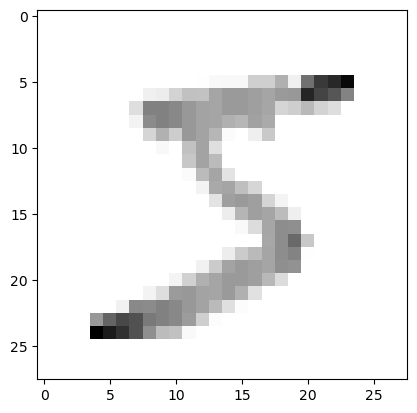

In [8]:
x_train=tf.keras.utils.normalize(x_train,axis=1)
x_test=tf.keras.utils.normalize(x_test,axis=1)
plt.imshow(x_train[0],cmap=plt.cm.binary)

In [9]:
print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [10]:
print(y_train[0])

5


In [50]:
import numpy as np
IMG_SIZE=28
x_trainr=np.array(x_train).reshape(-1,IMG_SIZE,IMG_SIZE,1)
x_testr=np.array(x_test).reshape(-1,IMG_SIZE,IMG_SIZE,1)
print("Training samples dimension",x_trainr.shape)
print("Testing samples dimension",x_testr.shape)

Training samples dimension (60000, 28, 28, 1)
Testing samples dimension (10000, 28, 28, 1)


In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten,Conv2D,MaxPooling2D

In [15]:
model=Sequential()
model.add(Conv2D(64 ,(3,3),input_shape=x_trainr.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64 ,(3,3),input_shape=x_trainr.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(64 ,(3,3),input_shape=x_trainr.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))

model.add(Dense(32))
model.add(Activation("relu"))

model.add(Dense(10))
model.add(Activation('softmax'))


In [16]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 26, 26, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_6 (Activation)            │ (None, 26, 26, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 11, 11, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_7 (Activation)            │ (None, 11, 11, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_8 (Activation)            │ (None, 3, 3, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 1, 1, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_9 (Activation)            │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_10 (Activation)           │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             330 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_11 (Activation)           │ (None, 10)                  │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 81,066 (316.66 KB)

 Trainable params: 81,066 (316.66 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
print("Total training samples=",len(x_trainr))

Total training samples= 60000


In [19]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=['accuracy'])

In [82]:
model.fit(x_trainr,y_train,epochs=10 ,validation_split=0.3)

Epoch 1/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 40s 31ms/step - accuracy: 0.9882 - loss: 0.0367 - val_accuracy: 0.9850 - val_loss: 0.0491
Epoch 2/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 38s 29ms/step - accuracy: 0.9905 - loss: 0.0294 - val_accuracy: 0.9764 - val_loss: 0.0798
Epoch 3/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 38s 29ms/step - accuracy: 0.9915 - loss: 0.0265 - val_accuracy: 0.9834 - val_loss: 0.0562
Epoch 4/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 39s 30ms/step - accuracy: 0.9928 - loss: 0.0218 - val_accuracy: 0.9812 - val_loss: 0.0725
Epoch 5/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 44s 33ms/step - accuracy: 0.9944 - loss: 0.0176 - val_accuracy: 0.9804 - val_loss: 0.0743
Epoch 6/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 38s 29ms/step - accuracy: 0.9945 - loss: 0.0176 - val_accuracy: 0.9850 - val_loss: 0.0618
Epoch 7/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 41s 29ms/step - accuracy: 0.9948 - loss: 0.0154 - val_accuracy: 0.9852 - val_loss: 0.0578
Epoch 8/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 38s 29ms/step - accuracy: 0.9960 -

In [83]:
test_loss , test_acc=model.evaluate(x_testr,y_test)
print("Test loss on 10,000 test samples",test_loss)
print("Validation accuracy on 10,000 test samples",test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9861 - loss: 0.0708
Test loss on 10,000 test samples 0.07076234370470047
Validation accuracy on 10,000 test samples 0.9861000180244446


In [84]:
predicions=model.predict([x_testr])

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step


In [85]:
print(predicions)

[[5.5001505e-14 2.4446632e-12 5.4039249e-09 ... 1.0000000e+00
  1.6257654e-12 2.4423459e-09]
 [4.0164402e-08 4.0154512e-12 1.0000000e+00 ... 1.1108554e-09
  7.2506960e-09 4.4855617e-12]
 [4.1009995e-10 1.0000000e+00 3.0597860e-08 ... 8.1204554e-09
  1.9945938e-09 2.5187266e-08]
 ...
 [6.4865105e-14 7.2173073e-16 3.9372348e-17 ... 2.3700607e-14
  2.5226145e-13 4.8997564e-12]
 [1.8553555e-12 4.2897530e-14 6.0724883e-11 ... 1.7501571e-16
  1.9192486e-08 3.8970241e-10]
 [2.6646578e-07 3.6908435e-10 1.9047646e-07 ... 1.1662312e-12
  1.5226574e-08 4.5679416e-09]]


In [86]:
print(np.argmax(predicions[0]))

7


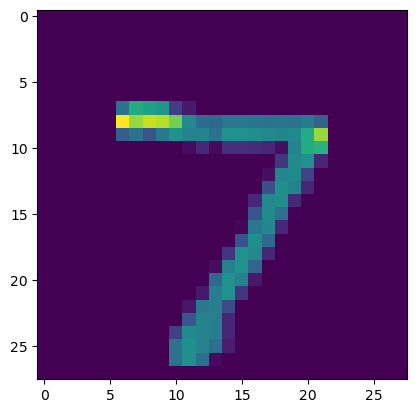

In [87]:
plt.imshow(x_test[0])

In [88]:
print(np.argmax(predicions[128]))

8


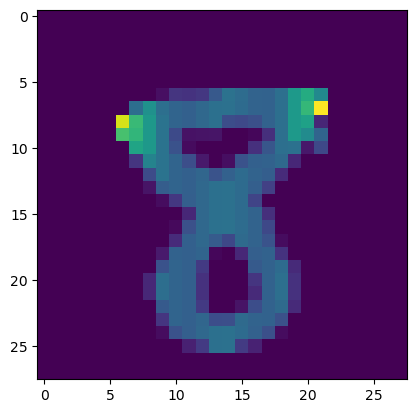

In [89]:
plt.imshow(x_test[128])

In [30]:
import cv2

In [90]:
img=cv2.imread('eight.png')

In [91]:
if img is not None:
    print(f"Image shape: {img.shape}")
else:
    print("Error: Failed to load the image. Please check the file path and format.")
    


Image shape: (903, 430, 3)


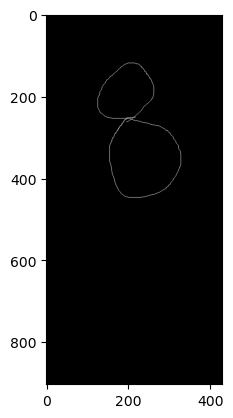

In [92]:
plt.imshow(img)

In [93]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

In [94]:
gray.shape

(903, 430)

In [95]:
resized=cv2.resize(gray ,(28,28),interpolation=cv2.INTER_AREA)

In [96]:
resized.shape

(28, 28)

In [97]:
newimg=tf.keras.utils.normalize(resized,axis=1)

In [98]:
newimg=np.array(newimg).reshape(-1,IMG_SIZE,IMG_SIZE,1)

In [99]:
newimg.shape

(1, 28, 28, 1)

In [100]:
predicions=model.predict(newimg)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


In [101]:
print(np.argmax(predicions))

8
